<a href="https://colab.research.google.com/github/AyushSrivastava27/EthVision/blob/main/EthVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ad47e3fb-26aa-1891-f1b0-6008a316808c)


In [2]:
!wget https://raw.githubusercontent.com/AyushSrivastava27/EthVision/main/ETH-USD.csv

--2024-03-26 05:51:44--  https://raw.githubusercontent.com/AyushSrivastava27/EthVision/main/ETH-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186463 (182K) [text/plain]
Saving to: ‘ETH-USD.csv’

ETH-USD.csv         100%[===================>] 182.09K  --.-KB/s    in 0.02s   

2024-03-26 05:51:44 (7.39 MB/s) - ‘ETH-USD.csv’ saved [186463/186463]



In [3]:
import pandas as pd
df = pd.read_csv("/content/ETH-USD.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,8.932500e+08
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2330 entries, 2017-11-09 to 2024-03-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2329 non-null   float64
 1   High       2329 non-null   float64
 2   Low        2329 non-null   float64
 3   Close      2329 non-null   float64
 4   Adj Close  2329 non-null   float64
 5   Volume     2329 non-null   float64
dtypes: float64(6)
memory usage: 127.4 KB


In [5]:
len(df)

2330

In [6]:
# Only want closing price for each day
ethereum_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
ethereum_prices.head()

,Price
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003


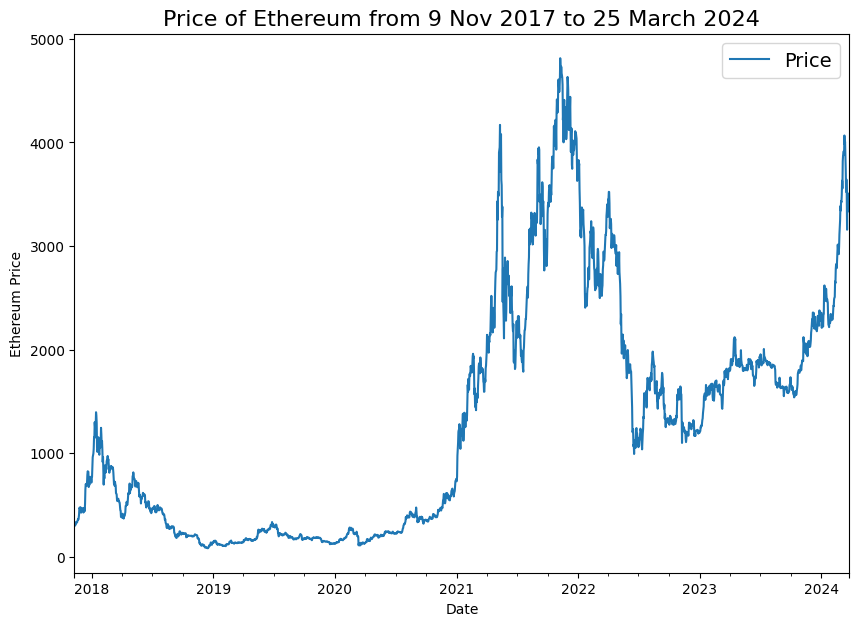

In [8]:
import matplotlib.pyplot as plt
ethereum_prices.plot(figsize = (10,7))
plt.ylabel("Ethereum Price")
plt.title("Price of Ethereum from 9 Nov 2017 to 25 March 2024", fontsize = 16)
plt.legend(fontsize = 14);


### Importing Time Series Data with Python's CSV Module

In [23]:
import csv
from datetime import datetime

timesteps = []
eth_price = []
with open("/content/ETH-USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))
    eth_price.append(line[4])

# View first 10 of each
timesteps[:10], eth_price[:10]

ValueError: could not convert string to float: 'null'

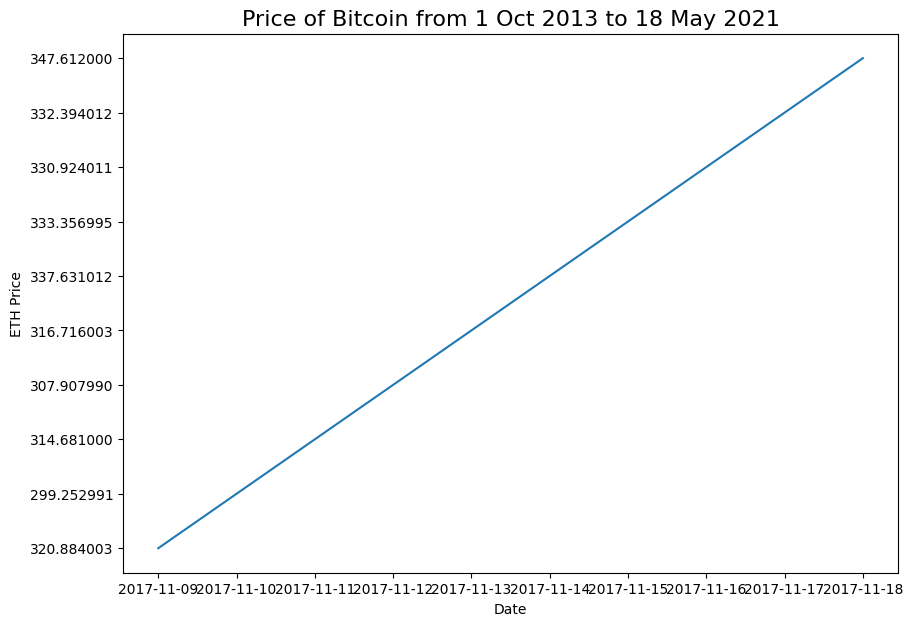

In [21]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps[:10], eth_price[:10])
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("ETH Price");